In [12]:
###IMPORT REQUIRED PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colormaps as cmaps
import os
from statistics import median_low
palette = cmaps.matter.discrete(14).colors

FIGURE 2: Sample B-Car Results

FIGURE 3: KNOCKOUTS

In [153]:
###READ IN KNOCKOUTS DATA
wt = 0.651

# #KNOCKOUTS SCREEN
# sum_knockouts = pd.DataFrame()
# for f in os.listdir('F:/knockouts/'):
#     if len(os.listdir('F:/knockouts/'+f)) != 0:
#         sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
#         sum_k['k'] = f
#         sum_knockouts = pd.concat([sum_knockouts, sum_k])
# print("N = ", len(sum_knockouts))
# sum_knockouts = sum_knockouts.reset_index(drop=True)
# sum_knockouts['defect'] =[100*(1-(wt-sum_knockouts.delta_lam[i])/wt) for i in range(len(sum_knockouts))]

# #Select intermediate defects
# int_defects = sum_knockouts.loc[sum_knockouts.defect > 6]
# int_defects = int_defects.loc[int_defects.defect < 50]
# print('Number of intermediate defects: ', len(int_defects))

# #KNOCKOUTS SCREEN DYNAMICS - SLOW
# trajs = []
# fba_trajs = []
# for f in os.listdir('F:/knockouts/'):
#     if len(os.listdir('F:/knockouts/'+f)) != 0:
#         sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
#         defect = 100*(1-(wt-sum_k.delta_lam[0])/wt)
#         if defect < 50:
#             ode_k = pd.read_csv('F:/knockouts/'+f+'/sim_ode_data_'+f+'.csv')
#             trajs.append(ode_k)
#             fba_k = pd.read_csv('F:/knockouts/'+f+'/sim_fba_data_'+f+'.csv')
#             fba_trajs.append(fba_k)

### W SWEEP EXPERIMENT
knockouts = ["b1779", "b2277", "b2779", "b0432", "b0721", "b3919", ""]
#ws = ['7.5e-8', '5.0e-9', '1.0e-8', '1.0e-7', '5.0e-7', '1.0e-6']
ws = ['7.5e-9','5.0e-9','2.5e-9','1.0e-8','7.5e-8','5.0e-8','2.5e-8','1.0e-7','7.5e-7','5.0e-7', '2.5e-7', '1.0e-6']
w_sweep_knockouts = pd.DataFrame()
for f in knockouts:
    for w in ws:
        if len(os.listdir('F:/additional_knockouts/knockouts/'+f)) != 0:
            try:
                sum_k = pd.read_csv('F:/additional_knockouts/knockouts/'+f+'/sum_data_'+f+'_'+w+'.csv')
                if f == '': sum_k['k'] = 'WT'
                else: sum_k['k'] = f
                sum_k['w'] = w
                #Compute peak B-car concentration, rise time from ODE data
                ode_k = pd.read_csv('F:/additional_knockouts/knockouts/'+f+'/sim_ode_data_'+f+'_'+w+'.csv')
                peak_bcar = ode_k.bcar.max()
                steady_state_bcar = ode_k.bcar[len(ode_k)-1]
                rise_time_index = np.where(ode_k.bcar >= steady_state_bcar*0.5)[0][0]
                rise_time_bcar = ode_k.time[rise_time_index]
                sum_k['rise_time'] = rise_time_bcar
                sum_k['peak_bcar'] = peak_bcar
                sum_k['run_N'] = len(ode_k)
                w_sweep_knockouts = pd.concat([w_sweep_knockouts, sum_k])
            except: print(f, w)

# ws.append('2.4e-7')
# for f in knockouts:
#     if len(os.listdir('F:/knockouts/'+f)) != 0:
#         sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
#         sum_k['k'] = f
#         sum_k['w'] = '2.4e-7'
#         #Compute peak B-car concentration, rise time from ODE data
#         ode_k = pd.read_csv('F:/knockouts/'+f+'/sim_ode_data_'+f+'.csv')
#         peak_bcar = ode_k.bcar.max()
#         steady_state_bcar = ode_k.bcar[len(ode_k)-1]
#         rise_time_index = np.where(ode_k.bcar >= steady_state_bcar*0.5)[0][0]
#         rise_time_bcar = ode_k.time[rise_time_index]
#         sum_k['rise_time'] = rise_time_bcar
#         sum_k['peak_bcar'] = peak_bcar
#         sum_k['run_N'] = len(ode_k)
#         w_sweep_knockouts = pd.concat([w_sweep_knockouts, sum_k])

print("N =", len(w_sweep_knockouts))
#Compute percent defect from raw growth rates
w_sweep_knockouts = w_sweep_knockouts.reset_index(drop=True)
w_sweep_knockouts['defect'] =[100*(1-(wt-w_sweep_knockouts.delta_lam[i])/wt) for i in range(len(w_sweep_knockouts))]


N = 84


(0.0, 100.0)

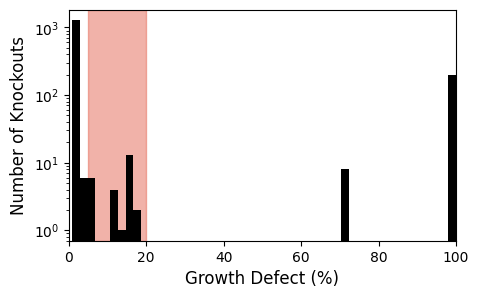

In [47]:
###FIGURE: Histogram of defects
fig, ax = plt.subplots(1, 1, figsize=(5,3))

#Unrunnable knockouts
defects = list(sum_knockouts.defect)
defects = defects + list(100*np.ones(21))

#Complete shading
# ax.axvspan(0, 5, alpha=0.5, color=palette[1])
# ax.axvspan(5, 20, alpha=0.5, color=palette[3])
# ax.axvspan(20, 90, alpha=0.5, color=palette[5])
# ax.axvspan(90, 110, alpha=0.5, color=palette[8])

#Intermediate knockouts shaded only
ax.axvspan(5, 20, alpha=0.5, color=palette[5])

ax.hist(defects, bins=50, color='black')

ax.set_yscale('log')
ax.set_ylabel('Number of Knockouts', fontsize=12)
ax.set_xlabel('Growth Defect (%)', fontsize = 12)
ax.set_xlim([0, 100])

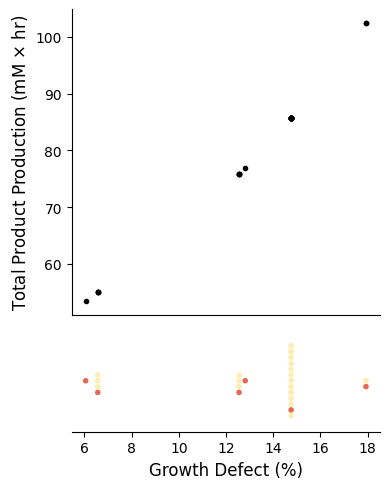

In [101]:
###FIGURE: Defect vs. production to select intermediate knockouts
fig, axs = plt.subplots(2, 1, figsize=(4,5), sharex=True, height_ratios=[3,1])

int_defects = int_defects.reset_index(drop=True)
selected = ["b1779", "b2277", "b2779", "b0432", "b0721", "b3919" ]
selected_defects= int_defects.loc[int_defects.k.isin(selected)]
int_defects['selected'] = [1 if int_defects.k[i] in selected else 0 for i in range(len(int_defects))]

ax = axs[0]
ax.plot(int_defects.defect, int_defects.bcar_tot, '.', color='black')
ax.tick_params(axis='x', bottom=False, labelsize=10)
ax.set_ylabel(r'Total Product Production (mM $\times$ hr)', fontsize = 12)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    
ax = axs[1]
sns.swarmplot(data=int_defects, x='defect', hue='selected', legend=False, palette=[palette[0], palette[5]], size=4)
ax.set_xlabel('Growth Defect (%)', fontsize = 12)
for axis in ['top','right', 'left']:
    ax.spines[axis].set_linewidth(0)
ax.tick_params(axis='y', left=False, labelsize=10)
fig.tight_layout()

AttributeError: 'builtin_function_or_method' object has no attribute 'iloc'

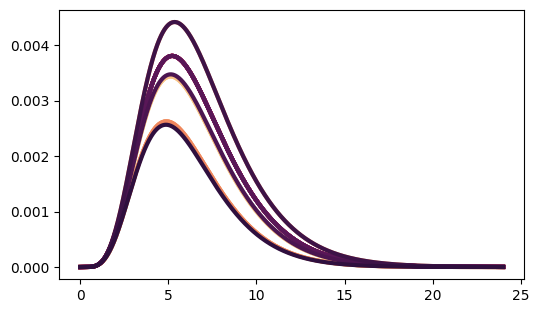

In [108]:
###FIGURE: Product trajectories
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
linewidth=3
palette = cmaps.matter.discrete(len(int_defects)).colors
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
i=-1
for f in int_defects.k:
    i = i+1
    sum_k = pd.read_csv('F:/knockouts/'+f+'/sum_data_'+f+'.csv')
    ode = pd.read_csv('F:/knockouts/'+f+'/sim_ode_data_'+f+'.csv')
    ax.plot(ode.time, ode.bcar, lw=linewidth, color=palette[i])

# plot wild type
ode = pd.read_csv('F:/knockouts/'+sorted.iloc[486].k+'/sim_ode_data_'+sorted.iloc[486].k+'.csv')
ax.plot(ode.time, ode.bcar, lw=linewidth, color='black')

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmaps.matter_r, orientation='vertical', drawedges=False, ticks=[0, 1])
cb.outline.set_color('white')
cb.outline.set_linewidth(0)
#cb.ax.set_yticks([])
cb.ax.set_yticklabels(['2%', '18%'], fontsize=axistickssize)
cb.ax.tick_params(width=0)

ax.set_xlabel('Time (hours)', fontsize=axislabelsize)
ax.set_ylabel('Concentration (mM)', fontsize=axislabelsize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(width=2)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
plt.gcf().add_axes(ax_cb)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Product Rise Time')

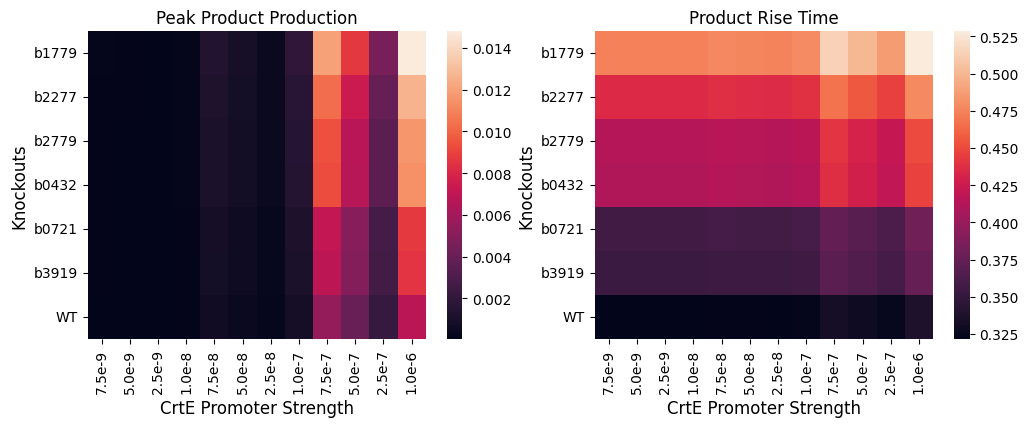

In [163]:
###FIGURE: Heatmap of W sweep experiment
k_names = knockouts[0:-1] + ['WT']
defect_map = w_sweep_knockouts.pivot(index='k', columns='w', values='defect').reindex(k_names).reindex(ws, axis=1)
rise_time_map = w_sweep_knockouts.pivot(index='k', columns='w', values='rise_time').reindex(k_names).reindex(ws, axis=1)
peak_bcar_map = w_sweep_knockouts.pivot(index='k', columns='w', values='peak_bcar').reindex(k_names).reindex(ws, axis=1)

fig, axs = plt.subplots(1, 2, figsize=(12,4))
ax = axs[0]
sns.heatmap(peak_bcar_map, ax=ax)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Knockouts', fontsize=12)
ax.set_xlabel('CrtE Promoter Strength', fontsize = 12)
ax.set_title('Peak Product Production')

ax = axs[1]
sns.heatmap(rise_time_map, ax=ax)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.set_ylabel('Knockouts', fontsize=12)
ax.set_xlabel('CrtE Promoter Strength', fontsize = 12)
ax.set_title('Product Rise Time')

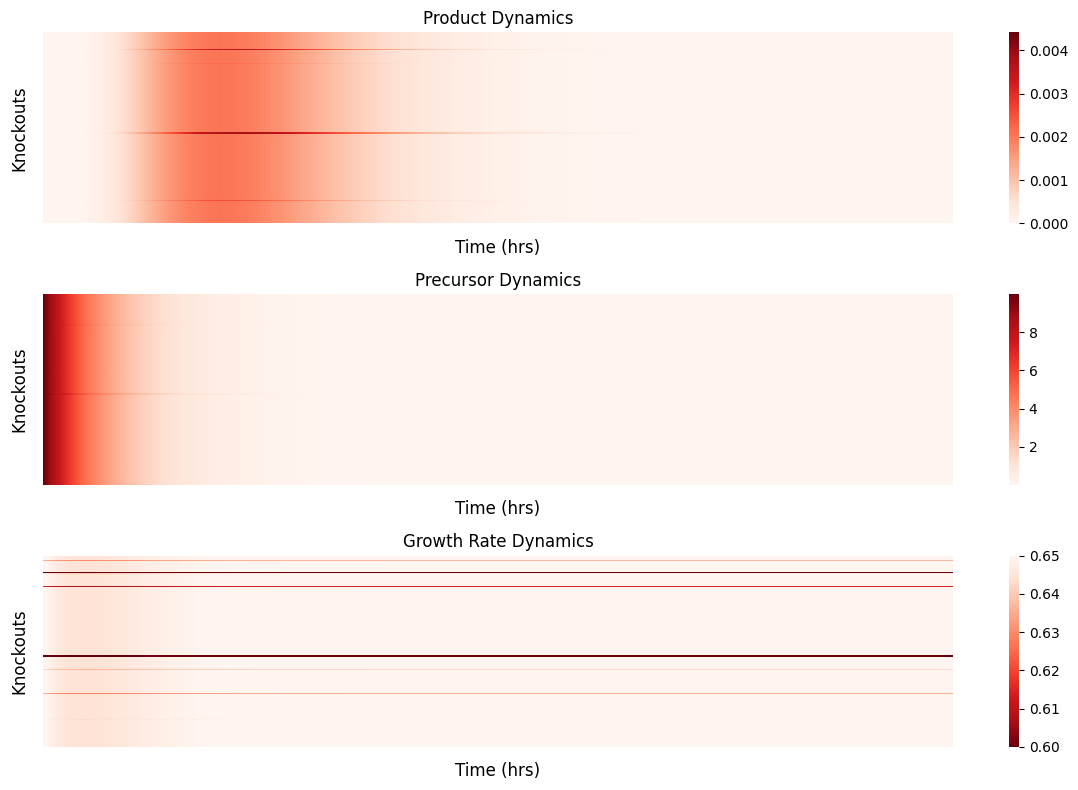

In [133]:
###FIGURE: Heatmap of all knockout trajectories
fig, axs = plt.subplots(3, 1, figsize=(12,8))
# prod_map = []
# fpp_map = []
# lam_map = []
# for i in range(len(trajs)):
#     prod_map.append(list(trajs[i].bcar)[::25])
#     fpp_map.append(list(trajs[i].fpp)[::25])
#     lam_map.append(list(fba_trajs[i].lam)[::25])

ax = axs[0]
sns.heatmap(prod_map, ax=ax, cmap = sns.color_palette('Reds', as_cmap=True))
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.tick_params(axis='x', bottom=False)
ax.tick_params(axis='y', left=False)

ax.set_ylabel('Knockouts', fontsize=12)
ax.set_xlabel('Time (hrs)', fontsize = 12)
ax.set_title('Product Dynamics')

ax = axs[1]
sns.heatmap(fpp_map, ax=ax, cmap=sns.color_palette('Reds', as_cmap=True))
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.tick_params(axis='x', bottom=False)
ax.tick_params(axis='y', left=False)

ax.set_ylabel('Knockouts', fontsize=12)
ax.set_xlabel('Time (hrs)', fontsize = 12)
ax.set_title('Precursor Dynamics')

ax = axs[2]
sns.heatmap(lam_map, ax=ax, vmin=0.6, vmax=0.65, cmap=sns.color_palette('Reds_r', as_cmap=True))
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.tick_params(axis='x', bottom=False)
ax.tick_params(axis='y', left=False)

ax.set_ylabel('Knockouts', fontsize=12)
ax.set_xlabel('Time (hrs)', fontsize = 12)
ax.set_title('Growth Rate Dynamics')
fig.tight_layout()

FIGURE 4: BURDEN

In [164]:
### READ IN BURDEN DATA
#Read in summary data
sum_nc = pd.read_csv('F:/burden/beta_carotene/nc/sum_data_nc_feas.csv')
sum_ur = pd.read_csv('F:/burden/beta_carotene/ur/sum_data_ur_feas.csv')

# Generates median curves from raw simulation data - SLOW
# #Read in ODE data to get dynamics
# ode_ur = pd.read_csv('F:/burden/beta_carotene/ur/ode_data_ur_total.csv')
# ode_nc = pd.read_csv('F:/burden/beta_carotene/nc/ode_data_nc_total.csv')

# #Filter for feasibility
# sum_ur_feas = sum_ur.loc[sum_ur.feas == 1].reset_index(drop=True)
# print('Upstream Repression N = ', len(sum_ur_feas))
# sum_nc_feas = sum_nc.loc[sum_nc.feas == 1].reset_index(drop=True)
# print('No Control N = ', len(sum_nc_feas))

# ur_Ws = ode_ur.W.unique()
# nc_Ws = ode_nc.W.unique()
# ur_w2s = [float(ur_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(ur_Ws))]
# nc_w2s = [float(nc_Ws[i].replace('(', '').replace(')', '').split(',')[1]) for i in range(len(nc_Ws))]

# ##Create lookup table between W and w2:
# lookup_ur = pd.DataFrame({'W':ur_Ws, 'w2':ur_w2s})
# lookup_nc = pd.DataFrame({'W':nc_Ws, 'w2':nc_w2s})

# #Find median product curve trajectory
# med_w2_ur = sum_ur_feas.loc[sum_ur_feas.bcar_tot == sum_ur_feas.bcar_tot.median()].reset_index(drop=True).w2.item()
# med_W_ur = lookup_ur.loc[lookup_ur.w2 == med_w2_ur].W.item()
# med_ode_ur = ode_ur.loc[ode_ur.W == med_W_ur]

# med_w2_nc = sum_nc_feas.loc[sum_nc_feas.bcar_tot == sum_nc_feas.bcar_tot.median()].reset_index(drop=True).w2.item()
# med_W_nc = lookup_nc.loc[lookup_nc.w2 == med_w2_nc].W.item()
# med_ode_nc = ode_nc.loc[ode_nc.W == med_W_nc]

# med_ode_nc.to_csv('F:/burden/beta_carotene/nc/median_ode.csv')
# med_ode_ur.to_csv('F:/burden/beta_carotene/ur/median_ode.csv')

#Read in median curves
med_ode_nc = pd.read_csv('F:/burden/beta_carotene/nc/median_ode.csv')
med_ode_ur = pd.read_csv('F:/burden/beta_carotene/ur/median_ode.csv')

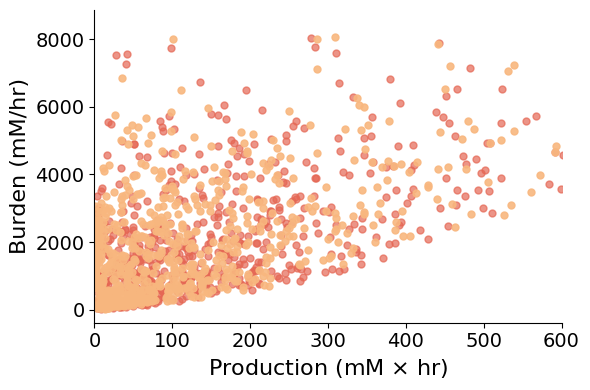

In [165]:
###FIGURE: Burden vs. production scatter plot
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel(r'Production (mM $\times$ hr)', fontsize=axislabelsize)
ax.set_ylabel('Burden (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 600])
ax.plot(sum_nc.bcar_tot, sum_nc.burden, '.', c=palette[5], ms=10, alpha=0.7, label='Open Loop')
ax.plot(sum_ur.bcar_tot, sum_ur.burden, '.', c=palette[2], ms=10, alpha=0.9, label='Upstream Repression')
fig.tight_layout()
# fig.savefig('../figs/bcar_burden_scatter.png', dpi=500)

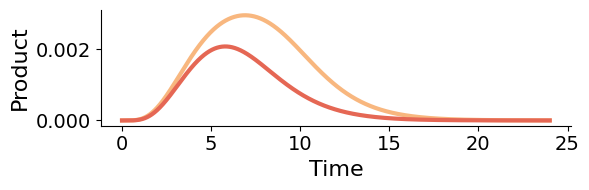

In [48]:
###FIGURE: Median product curves with confidence intervals
palette = cmaps.matter.discrete(14).colors

linewidth = 3
axislabelsize=16
axistickssize=14
legendsize=12
titlesize = 16
fig, axs = plt.subplots(1, 1, figsize=(6, 2))

ax = axs
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlabel('Time', fontsize=axislabelsize)
ax.set_ylabel('Product', fontsize=axislabelsize)
ax.plot(med_ode_ur.time, med_ode_ur.bcar, color=palette[2], lw=3, label='Upstream\nRepression')
ax.plot(med_ode_nc.time, med_ode_nc.bcar, color=palette[5], lw=3, label='Open Loop')
fig.tight_layout()
#fig.savefig('../figs/bcar_product_curve.png', dpi=500)

### Burden Figure brainstorming section

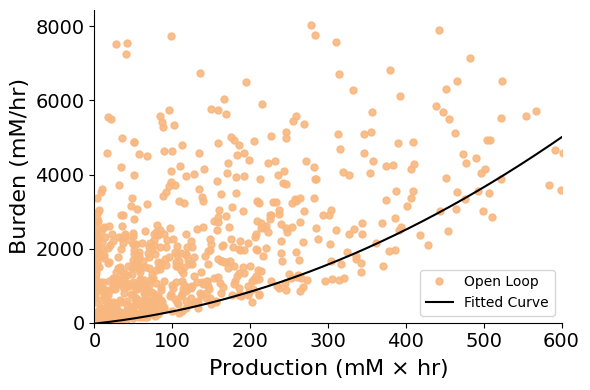

In [234]:
# Step 1: Calculate the minimum y-value for a range of x-values to get the lower edge
x_values = np.linspace(0, 600, 600)  # Adjust the range and number of points as needed
y_min_values = []

for x in x_values:
    # Collect all y-values (Burden) that correspond to the current x-value (Production) within a certain range
    y_values_at_x = sum_nc.burden[(sum_nc.bcar_tot >= x - 5) & (sum_nc.bcar_tot <= x + 5)]
    if len(y_values_at_x) > 0:
        y_min_values.append(np.min(y_values_at_x))
    else:
        y_min_values.append(np.nan)

# Step 2: Use polyfit to fit a polynomial to these minimum values
# Here we use a 2nd degree polynomial, but you can increase the degree for a more complex curve
coefficients = np.polyfit(x_values[~np.isnan(y_min_values)], np.array(y_min_values)[~np.isnan(y_min_values)], 2)
polynomial = np.poly1d(coefficients)

# Step 3: Use the polynomial to calculate fitted y-values
fitted_y_values = polynomial(x_values)


fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel(r'Production (mM $\times$ hr)', fontsize=axislabelsize)
ax.set_ylabel('Burden (mM/hr)', fontsize=axislabelsize)

# Step 4: Plot the original data points
ax.plot(sum_nc.bcar_tot, sum_nc.burden, '.', c=palette[2], ms=10, alpha=0.9, label='Open Loop')
#plt.plot(sum_ur.bcar_tot, sum_ur.burden, '.', c='blue', ms=10, alpha=0.9, label='Upstream Repression')

# Step 5: Plot the fitted curve
ax.plot(x_values, fitted_y_values, '-', c='black', label='Fitted Curve')

# Add labels, legend, etc.
ax.set_xlabel(r'Production (mM $\times$ hr)')
ax.set_ylabel('Burden (mM/hr)')
ax.legend()
ax.set_xlim([0, 600])
ax.set_ylim([0, max(sum_nc.burden)])  # Adjust the y-limit as needed

ax.set_xlabel(r'Production (mM $\times$ hr)', fontsize=axislabelsize)
ax.set_ylabel('Burden (mM/hr)', fontsize=axislabelsize)
ax.tick_params(axis='y', labelsize=axistickssize)
ax.tick_params(axis='x', labelsize=axistickssize)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 600])
plt.tight_layout()

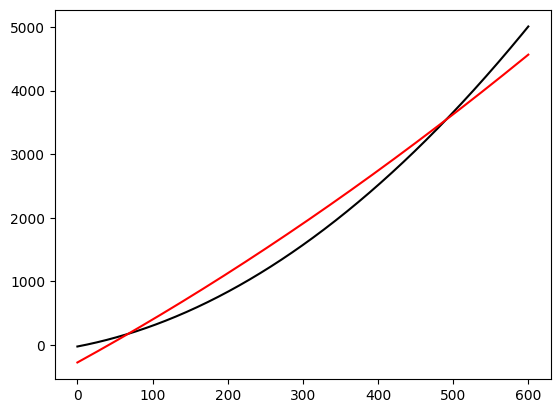

In [235]:
## Only lower envelopes 
# Step 1: Calculate the minimum y-value for a range of x-values to get the lower edge
x_values = np.linspace(0, 600, 600)  # Adjust the range and number of points as needed
y_min_values = []

for x in x_values:
    # Collect all y-values (Burden) that correspond to the current x-value (Production) within a certain range
    y_values_at_x = sum_ur.burden[(sum_ur.bcar_tot >= x - 5) & (sum_ur.bcar_tot <= x + 5)]
    if len(y_values_at_x) > 0:
        y_min_values.append(np.min(y_values_at_x))
    else:
        y_min_values.append(np.nan)

# Step 2: Use polyfit to fit a polynomial to these minimum values
# Here we use a 2nd degree polynomial, but you can increase the degree for a more complex curve
coefficients = np.polyfit(x_values[~np.isnan(y_min_values)], np.array(y_min_values)[~np.isnan(y_min_values)], 2)
polynomial = np.poly1d(coefficients)

# Step 3: Use the polynomial to calculate fitted y-values
fitted_y_values_ur = polynomial(x_values)

plt.plot(x_values, fitted_y_values, '-', c='black', label='Fitted Curve')
plt.plot(x_values, fitted_y_values_ur, '-', c='red', label='Fitted Curve')


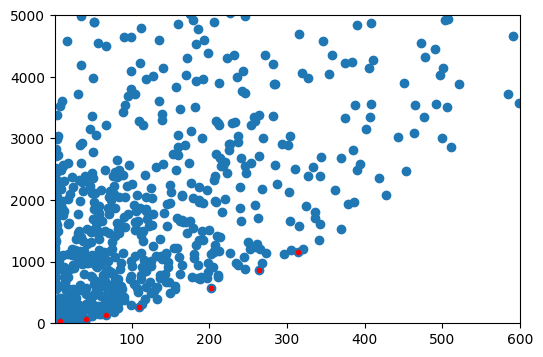

In [218]:
###FIGURE: Lower bounds only, two cloud plots - CONVEX HULL
limited = sum_nc.loc[sum_nc.bcar_tot < 600]
x = limited.bcar_tot
y = limited.burden

# points = np.array(sum_nc[['bcar_tot', 'burden']])
# from scipy.spatial import ConvexHull
# hull = ConvexHull(points)
# optimality = points[hull.vertices]

# bottomonly = []
# for o in optimality:
#     if o[0]>5 and o[1]<7800:
#         bottomonly.append(o)
# bottomonly = np.array(bottomonly)

# from scipy.optimize import curve_fit
# def objective(x, a, b):
#     return a * x + b
# popt, _ = curve_fit(objective, x, y) 
# a, b = popt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x, y)
# x_line = np.arange(min(x), max(x), 1)
# y_line = objective(x_line, a, b)
# b_values = y - a * x
# ax.plot(x_line, objective(x_line, a, np.min(b_values)), '--', color='red', label="lower bound")
ax.set_xlim([1, 600])
ax.set_ylim([0, 5000])
# ax.plot(bottomonly[:, 0], bottomonly[:, 1], 'r.')